# The ipnb2tex.py Script

The `ipnb2tex.py` reads the IPython notebook and converts it to a \LaTeX{} set of files (a `*.tex` file and a number of images).  The script is invoked as follows:  

`python ipnb2tex.py file.ipynb file.tex imagedir -l`

where   

- `file.ipynb`  [optional]  is the name of the input IPython notebook file.   If no input filename is  supplied, all  `.ipynb` files in current directory will be processed.   In this event the output filenames will be the same as the `.ipynb` files, just with a `tex` filetype.  

- `file.tex` [optional] is the name of output \LaTeX{} file. If none is given the output filename will be the same as the input file, but with the `.tex` extension.   

- `imagedir`   [optional]  is the directory where images are written to.  If not given, this image directory will be the `./pic` directory.  

- `-l` [optional] (the lower case letter el) if this option is given the code listings are floated to the end of the document. Otherwise the code listings are placed in the document where they occur in the notebook.

# Heading 1 nb2pdf 

Heading 1 is a \LaTeX{} chapter.  
Headings down to level 5 (\LaTeX{} paragraph) are supported. 
Headings at level 6 are treated as normal body text.
If you don't need a chapter (i.e., for an article), just don't use a heading at level 1.

When any level of section heading is formed, a label is automatically created from the text in the heading, removing all non-alpha characters.  If the section heading is very long the the label will also be long, so keep it short. Also, don't use the same text twice as a heading.

## Heading 2 Second-level heading

### Heading 3

#### Heading 4

##### Heading 5

###### Heading 6

some more markdown.

# Heading 1

## Heading 2

### Heading 3

#### Heading 4

##### Heading 5

###### Heading 6



## LaTeX Template Format and the Header File

### Default Style (Report)

The notebook can be converted to the LaTeX `Report` format with no additional files or document class.  A 'standard' notebook, where the first cell is not `Raw NBConvert` will be prepended with a short section of LaTeX code for a standard LaTeX Report.  A number of pacakges are also `\usepackage{}`ed, as required by the converted LaTeX code.

### User-Defined Style

The notebook can optionally be converted to a user-defined format with minimal effort.  The example files included the GitHub distribution provides a 'work package' format class file (`workpackage.cls`) and a header file (`header.tex`).

The first cell of the notebook must be a `RawNBConvert` cell with at least the following contents (see the first cell of this notebook for an example):

    \documentclass that you want to use
    \input{header.tex}
    whatever preamble lines you require
    \begin{document}  

Then follows whatever content you need to use your document style. Write/change this file to change the front  matter and appearance of the document.  The script adds the `\end{document}` line after the notebook cells' contents.

The `header.tex` file provides the functionality required by the converter-created code. This content is input using the \LaTeX{} input command.  A number of pacakges are `\usepackage{}`ed, as required by the converted LaTeX code.

## Company Logo 

The work package template has a `logo.png` file which is used to define a logo on top of the page.  The present image is empty, so no logo will show.  You can add your own logo to this file.

## The images directory

The script saves the png files in the `./pic` directory, and the \LaTeX{} code also expects to find the png files there.  Hence, there must be an existing `./pic` directory in the directory where you run the script.  If an alternative name is given on the command line, the alternative name will be used.

## `Raw NBConvert` cells

The `Raw NBConvert` cell type can be used to propagate text without any modification to the output stream.  The IPython notebook will not touch this text; it is passed on as-is to the converter code. This this case we can add \LaTeX{} code that will progress straight through to the \LaTeX{} compiler.

This raw capability is very useful if the notebook is intended to be exported to \LaTeX{} as primary output.  I find myself writing most of such documentation in raw latex in a 'Raw NBConvert' cell.  In this mode most of the notebook cells are never rendered to HTML, since you are reading and editing the \LaTeX{} and it stays in \LaTeX{} for display purposes as well. So you get the full benefit of all \LaTeX{} functionality (except that it is not rendered inside the notebook) and all the other benefits of the notebook.

## Captions

There are three objects that can have captions: listings, figures and tables.

Figures and tables without captions are non-floating and appear in the text at the position it is found in the input file.  Figures and tables with captions are floating.

Listings are always non-floating.

A single cell can contain any combination of captions, and these are indicated in the metadata field of the cell. Select the `Edit Metadata` drop-down option in the `Cell Toolbar` drop-down box (towards the right of the toolbar). This should expose metadata buttons on all the cells. Click on the button and type in the  metadata.  

The metadata has the following structure:

    {
      "listingCaption": {
        "caption": "Comparison of effective drag parameters",
        "label": "lst:comparedrag",
        "outputCaption": ""
      },
      "figureCaption": {
        "caption": "Caption text for first figure",
        "label": "fig:lab1",
        "scale": "0.2",
        "width": "0.2"
      },
      "tableCaption": {
        "caption": "Caption text for first table",
        "label": "tab:lab1",
        "format": "{|p{10mm}|l|r|c|c|p{50mm}|p{20mm}|}",
        "fontsize": "normalsize"
      }
    }

Note the placement of commas. No newlines are allowed in a single string in the metadata.


## Python code

Python code blocks are printed using the \LaTeX{} `listings` package.  The format details can be defined in the header template file.  These code listings can be supplied with a caption and a label (but these code blocks are not floating entities). 

      {
      "listingCaption": {
        "caption": "Caption text for first listing",
        "label": "lst:listing1",
        "outputCaption": "Caption for first listing output"
      }
    }
    
where the different fields have the following meanings:

1. `caption` specifies the text to be used in the listings caption.  If this metadata field is not supplied, the listing will not be given a caption.  

2. `label` specifies the label to be used for the listing, which can be used in \LaTeX{} to reference the listing.  The code block uses the label exactly as given in the metadata field.  If the output listing is given an `outputCaption`, the output caption is labelled by the a label starting with the `label` string given, but appended with the string `-out` (i.e., `lst:listing1-out` in this case).  

3. `outputCaption` specifies the label that is used for the output listing of the cell. If this metadata field is not supplied, the output listing will not be given a caption.  


We can refer to Listings~\ref{lst:listing1}, \ref{lst:listing1-out}, \ref{lst:listing2}, and \ref{lst:listing3}.  These listings may not be defined in the IPython output but they are defined in the \LaTeX{} output.

You can also refer to Figures~\ref{fig:lab1-0} and \ref{fig:lab4-2}.

## Floated code listings

In order to improve readability in the document, the code listings can be floated to the end of the document by using the `-l` switch on the command line.  If this switch is used, the listing is saved to a string that is only appended to the \LaTeX{} document and the end of the conversion.  At the location in the document where the code listing would have been, a reference sentence to the code is included.  The  sentence is constructed as follows:

    See Listing~\ref{lst:autolistingcellX} for the code {purpose}.
    
where the symbolic link is constructed using the cell number and the text used in the `{purpose}` part is taken from the first line of the code, if the first line is a comment.  Hence if the code in cell 3 starts with the lines

    # to prepare the environment
    import numpy as np

a text line of the following form will be created:

    See Listing~\ref{lst:autolistingcell3} for the code to prepare the environment.

Just maintain the discipline to write good comments in the first line, keeping in mind that  the comment will end up in the body of the document with the reference.

If a code cell does not start with a comment, no text will be inserted and the form will be

    See Listing~\ref{lst:autolistingcell24} for the code.

In [1]:
# to prepare the environment
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

import os.path
import numpy as np
%matplotlib inline

import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


The following code block has the metadata  

    {
      "listingCaption": {
        "caption": "Caption text for second listing",
        "label": "lst:listing2"
      }
    }

which will give the code block a caption and a label, but the output is not captioned.

The code block also demonstrates how long lines are handled in this lstlistings configuration, with a linefeed symbol to mark the line.

In [2]:
#
print(' ')
print('Radius = {}'.format(6))
print('Frontal area = {} m2'.format(7))
print('This is a very long line of python code, that is supposed to flow over to the next line, in order to test the listing display')

 
Radius = 6
Frontal area = 7 m2
This is a very long line of python code, that is supposed to flow over to the next line, in order to test the listing display


In [3]:
# to print the value
a = [0, 1]
for v in a:
    print(v)

0
1


The following code block has no metadata, and hence no captions on either the code or the output listings.


In [4]:
print('code with no listing caption')

code with no listing caption


Output emanating from different cells _may_ result in different output listings in \LaTeX{} even if they appear in a single output box in the notebook.  The cells below attempt to recreate a similar scenario in a different application, but it does not seem to repeat the problem here.

In [5]:
def doprint(i):
    print('function output {}'.format(i))
    return int(i)

In [6]:
for i in [1,2,3]:
    si = str(i)
    v = doprint(si)

val = v * 3   
print(val)
print(v)

function output 1
function output 2
function output 3
9
3


## Bitmaps

PNG images, read in from externally or created by Matplotlib, are imported into the \LaTeX{} code with lines of the following form:

`\includegraphics[scale=0.2]{./pngs/test2LaTeX_21_0.png}`

where the scale determines the size of the image (obtained from metadata, see below), and the image file name is constructed from the notebook file name and cell information.  The name is the concatenation of the notebook file name, the cell index (index number of the cell in the notebook file) and the sub-index image in the cell's output (there can be more than one image). All indices are zero based.

The scale or width is read from the metadata, which must be structured as follows:

    {
      "figureCaption": {
        "caption": "Caption text for first figure",
        "label": "fig:lab1",
        "scale": "0.2",
        "width": "0.2"
      },
      "listingCaption": {
        "caption": "Listing caption in cell with a figure",
        "label": "lst:figurelisting",
        "outputCaption": "Output for a cell with a figure"
      }
    }
    
Width is the fraction of \LaTeX{} textwidth, i.e., if width=1, the graphic will be the full width of the text on the page. Width have precedance over scale and if width is given, scale is ignored.

The metadata also contains a caption string, and a label for the figure.  The type must be `figure`.

If the `caption` field is given (or has non-zero length), the image will be written to a \LaTeX{} float with a caption (and label).  If the `caption` fields is not given, the image will not be encapsulated in the floating figure.

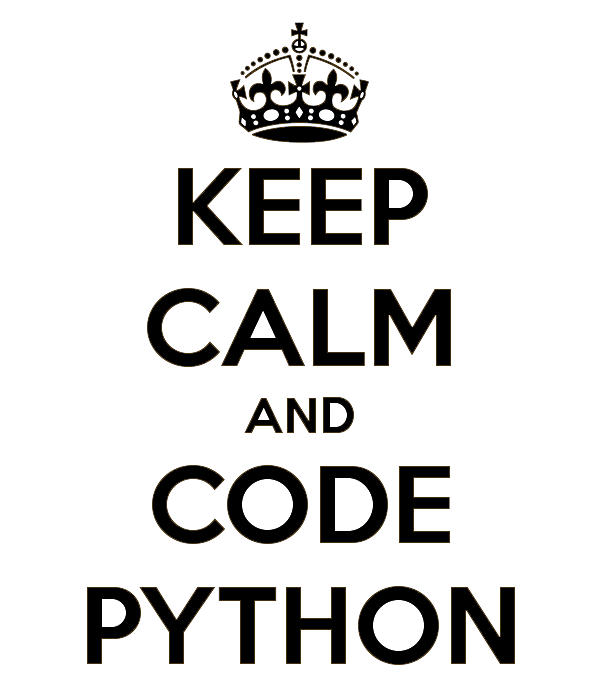

also force print output


In [7]:
#this figure is given meta data caption parameters, it will be floated in the latex export
display(Image(filename='images/keep-calm-and-code-python_BW.png', width=250, height=250))
print('also force print output')


The following figure is not floating, but is scaled down to be smaller.

    {
      "figureCaption": {
        "scale": "0.3"
      }
    }



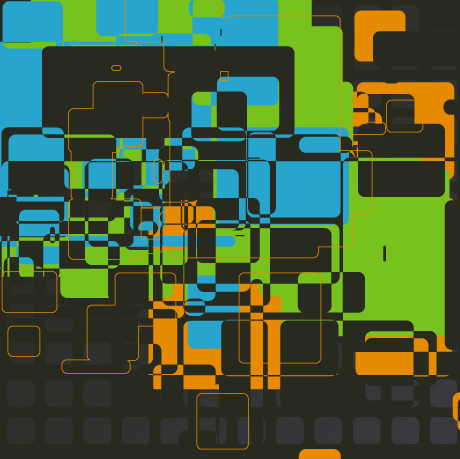

In [8]:
#this figure is not given meta data caption parameters, it will be inlined in the latex export
display(Image(filename='images/random-squares-2.png', width=200, height=200))

The following Matplotlib plot is scaled and floating.

    {
      "figureCaption": {
        "caption": "Caption text for third figure",
        "label": "fig:lab3",
        "scale": "0.4"
      }
    }

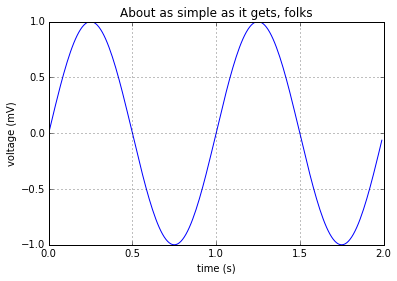

In [9]:
%matplotlib inline

import pylab as pl
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
pl.plot(t, s)
pl.xlabel('time (s)')
pl.ylabel('voltage (mV)')
pl.title('About as simple as it gets, folks')
pl.grid(True)


It is possible to have more than one plot in a single cell output.  In this case each output can be made floating separately or be non-floated (you can even mix floating and non-floating).  The captions are given in the metadata in the following format:

    {
      "figureCaption": {
        "caption": "['Caption text for (first) fourth figure','','Caption text for (third) fourth figure']",
        "label": "fig:lab4",
        "scale": "[0.5, 0.5, 0.5]"
      }
    }

In this case the caption strings and scaling values are allocated to the sequence of images in the order given.  If a caption string is zero length, that specific image will be non-floating.  The float labels are determined from the root value given in the metadata, but with the output sub-index appended, as in `fig:lab4-0`, `fig:lab4-1`, `fig:lab4-2`.

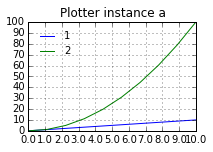

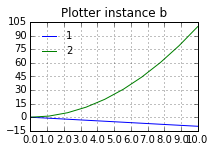

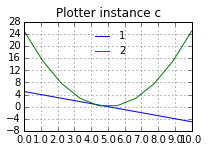

In [10]:
import pyradi.ryplot as ryplot

x = np.linspace(0,10,10)
a = ryplot.Plotter(1,figsize=(3,2))
b = ryplot.Plotter(2,figsize=(3,2))
c = ryplot.Plotter(3,figsize=(3,2))
for i in [1,2]:
    a.plot(1,x,x ** i,'Plotter instance a',label=[str(i)])
    b.plot(1,x,(-x) ** i,'Plotter instance b',label=[str(i)])
    c.plot(1,x,(5-x) ** i,'Plotter instance c',label=[str(i)])

You can write HTML to the cell's output and have it displayed in the browser and also in the LaTeX file.  This graphic is not currently output as a floating figure in LaTeX, it will be done in a future version.

In [15]:
htmlstr = '<p><img src="images/random-squares-2.png" width=100 />'
HTML(htmlstr)                 

## Cells with Python errors

The following line must be uncommented to have effect.

In [12]:
# type(eval("this is a test string")) is not list

## Embedded code (verbatim text)

Some firewalls are set up to grant `localhost` execution rights.  In this case the server can be started with the command  
`ipython notebook --ip=localhost`  


Once started, the pages are served from   
`http://localhost:8888/`  
and not from `http://127.0.0.1:8888/`.

Embedded code meant for illustration instead of execution in Python:

    def hello_ipython():
        print "Hello IPython!"

## Hyperlinks, references and citations

### Embedded hyperlinks

The [IPython website](http://ipython.org/) is the central repository of all things IPython.
There are some really nice [videos](https://www.youtube.com/watch?v=aIXED26Wppg) on YouTube.

For *URI references*, the `[IPython website](http://ipython.org/)` markup structure is read and the URI is used to create a citation label (`httpipythonorg`) and the URI (`http://ipython.org/`) is written to a new \LaTeX{} bibtex file for the references in this notebook.

For *other types of references* a workaround is required.  IPython is currently weak in the area of other types of references, because of limitations in the markup language.  The `ipnb2tex.py` script makes provision for including bibtex entries, by embedding the complete bibtex entry in a metadata field.

Using the above approach creates a new bibtex file using the data in the notebook. Perhaps you might want to reference an existing bibtex file, mapping to the citation labels used in the notebook.
The issue here is that the IPython notebook does not have access to your \LaTeX{} bibtex file, so it does not know the citation references you want to use (the ones in your existing bibtex file).  
The approach taken here is to provide a look-up translation table in this or any prior cell of the notebook, to translate citation references from the local name to your existing bibtex name.  This is done in a cross reference dictionary that maps the names created internally to the names in your external bibtex file.

The metadata has two different fields, one to do the citation label mapping and the other to embed complete bibtex entries in the metadata.  The metadata field must have the following format:

    {
      "bibxref": {
        "httpipythonorg": "httpipythonorg",
        "httpswwwyoutubecomwatchvaIXED26Wppg": "httpswwwyoutubecomwatchvaIXED26Wppg",
        "httpsenwikipediaorgwikiWrappednormaldistribution": 
                "httpsenwikipediaorgwikiWrappednormaldistribution"
      },
      "bibtexentry": {
        "wing2006computational": "@article{wing2006computational,  title={Computational thinking},  
               author={Wing, Jeannette M},  journal={Communications of the ACM},  volume={49},  
               number={3},  pages={33--35},  year={2006}}",
        "gracec": "@MISC{gracec,  author = {Grace Cathedral},  title = {The Cathedral Labyrinths},  
               url = {http://www.gracecathedral.org/labyrinth/}}"
      }
    }

where (1) the bibxref keys are the local names and the values are the names in your existing bibtex file and (2) the bibtexentry keys are the citation labels used in the notebook.  In the above example the bibxref maps to the same names, because I am using the locally generated bibtex file. Normally you would use your bibtex database entries.

Note that the IPython notebook is somewhat finicky on the json format; each single entry in the above metadata must be on a single line (line-feeds inside the strings are not allowed --- lines tend to be very long).  Also, note the location of commas, there should be commas after all entries, except the last entry in a given scope.

The `ipnb2tex.py` script:

1. Loads/appends the bibxref translation table from any/all cells (if present).
2. Reads the `[]()` markup structure and then builds a citation reference from the URI (by removing some characters).
3. Create a bibtex entry for the reference (subsequently written to file).
4. Using bibxref, translates the local citation label to your existing citation label.

If you included bibtex items in the metadata, you can refer to them using the normal \LaTeX{} notation. Test \cite{wing2006computational} and \cite{gracec}.

## General markdown formatting

Markdown basics: lists, markup and code  


* list item1   in markdown format.
* list item2   
    - nested <font size="3" color="red">list item3</font> - font attributes not yet supported.  
* *italics*    
* **bold**
* `fixed font`    

<p/>


1.  Enumerated list item 1 in markdown format.
    1. sub lit element 1  
    1. sub lit element 2  
2.  Enumerated list item 2.  


The markup language (or the converter) breaks if an itemized list and an enumerated list are immediately adjacent --- we need to separate the lists by text with with a `<p/>`.

<p>Lists in HTML format</p>

<ul>
<li>list item</li>
<li>list item</li>
<ul>
<li>nested <font size="3" color="red">list item</font></li>
</ul>
<li><em>italics</em></li>
<li><strong>bold</strong></li>

<li><code>fixed font</code></li>
</ul>

<ol>
<li>Enumerated list item 1.</li>
<ol>
    <li>sub lit element 1</li>
    <li>sub lit element 2</li>
</ol>

<li>Enumerated list item 2.</li>

</ol>




##Tables

The table in this cell is rendered in \LaTeX{} with the following metadata:  

    {
      "tableCaption": {
        "caption": "Caption text for first table",
        "label": "tab:lab1",
        "format": "{|p{10mm}|l|r|c|c|p{50mm}|p{20mm}|}",
        "fontsize": "normalsize"
      }
    }

A complex HTML table with row spans and column spans:

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none'>
 <tr>
  <td width=109 valign=top style='width:82.1pt;border:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><a name="_GoBack"></a><span lang=EN-ZA>a</span></p>
  </td>
  <td width=219 colspan=2 valign=top style='width:164.2pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>b</span></p>
  </td>
  <td width=219 colspan=3 valign=top style='width:164.25pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>c</span></p>
  </td>
  <td width=219  valign=top style='width:164.25pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>1</span></p>
  </td>
 </tr>
 <tr>
  <td width=109 rowspan=2 valign=top style='width:82.1pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>e</span></p>
  </td>
  <td width=109 valign=top style='width:82.1pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>f</span></p>
  </td>
  <td width=219 colspan=2 valign=top style='width:164.2pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>g</span></p>
  </td>
  <td width=110 valign=top style='width:82.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>h</span></p>
  </td>
  <td width=110 valign=top style='width:82.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>i</span></p>
  </td>
   <td width=219  valign=top style='width:164.25pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>2</span></p>
  </td>
</tr>
 <tr>
  <td width=219 colspan=2 valign=top style='width:164.2pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>j</span></p>
  </td>
  <td width=109 valign=top style='width:82.1pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>k</span></p>
  </td>
  <td width=110 rowspan=2 valign=top style='width:82.15pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>l</span></p>
  </td>
  <td width=110 valign=top style='width:82.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>m</span></p>
  </td>
  <td width=219  valign=top style='width:164.25pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>3</span></p>
  </td>
 </tr>
 <tr>
  <td width=109 valign=top style='width:82.1pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>n</span></p>
  </td>
  <td width=109 valign=top style='width:82.1pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>o</span></p>
  </td>
  <td width=109 valign=top style='width:82.1pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>p</span></p>
  </td>
  <td width=109 valign=top style='width:82.1pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>q</span></p>
  </td>
  <td width=110 valign=top style='width:82.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>r</span></p>
  </td>
  <td width=219  valign=top style='width:164.25pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>4</span></p>
  </td>
 </tr>
 <tr>
  <td width=109 valign=top style='width:82.1pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>s</span></p>
  </td>
  <td width=109 valign=top style='width:82.1pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>t</span></p>
  </td>
  <td width=109 valign=top style='width:82.1pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>u</span></p>
  </td>
  <td width=109 valign=top style='width:82.1pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>v</span></p>
  </td>
  <td width=110 valign=top style='width:82.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>w</span></p>
  </td>
  <td width=110 valign=top style='width:82.15pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>x</span></p>
  </td>
  <td width=219  valign=top style='width:164.25pt;border:solid windowtext 1.0pt;
  border-left:none;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoBodyText><span lang=EN-ZA>5</span></p>
  </td>
 </tr>
</table>


The tables in this cell are rendered in \LaTeX{} with the following metadata:  

    {
      "tableCaption": {
        "caption": "['Caption text for (first) second table','','Caption text for (third) second table']",
        "label": "tab:lab2",
        "format": "['{|p{20mm}|r|}','','{|c|l|}']",
        "fontsize": "['normalsize', 'tiny', 'Large']"
      }
    }
    
Github flavoured markdown tables are supported in the IPython notebook (floating in \LaTeX{} as Table~\ref{tab:lab2-0}):  

| This | is   |
|------|------|
|   a  | table| 

second table  (non-floating in \LaTeX{}):  

| This | is   |
|------|------|
|   a  | small table| 


PHP Markdown Extra is also supported  (floating in \LaTeX{} as Table~\ref{tab:lab2-2}):  

First Header  | Second Header
------------- | -------------
Content Cell  | Content Cell
Content Cell  | Content Cell

Both of these markup extensions require Python Markdown 2.4.1 to render HTML.

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th>CHead 1</th>
      <th colspan="2" halign="left">CLevel 1:1</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>CHead 2</th>
      <th>CLevel 2:1</th>
      <th>CLevel 2:2</th>
    </tr>
    <tr>
      <th>RHead 1</th>
      <th>RHead 2</th>
      <th>RHead 3</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="9" valign="top">RLevel 1:1%_</th>
      <th rowspan="3" valign="top">RLevel 2:1</th>
      <th>A</th>
      <td> 6000%</td>
      <td> 6156</td>
    </tr>
    <tr>
      <th>B</th>
      <td> 2417</td>
      <td> 2471</td>
    </tr>
    <tr>
      <th>C</th>
      <td> 1274</td>
      <td> 1347</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">RLevel 2:2</th>
      <th>A</th>
      <td>10909</td>
      <td>11041</td>
    </tr>
    <tr>
      <th>B</th>
      <td> 4400</td>
      <td> 4408</td>
    </tr>
    <tr>
      <th>C</th>
      <td> 2309</td>
      <td> 2319</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">RLevel 2:3</th>
      <th>A</th>
      <td>11573</td>
      <td>11178</td>
    </tr>
    <tr>
      <th>B</th>
      <td> 4461</td>
      <td> 4976</td>
    </tr>
    <tr>
      <th>C</th>
      <td> 2432</td>
      <td> 2410</td>
    </tr>
    <tr>
      <th rowspan="9" valign="top">RLevel 1:2%_</th>
      <th rowspan="3" valign="top">RLevel 2:1</th>
      <th>A</th>
      <td> 6728</td>
      <td> 6595</td>
    </tr>
    <tr>
      <th>B</th>
      <td> 2322</td>
      <td> 2679</td>
    </tr>
    <tr>
      <th>C</th>
      <td> 1300</td>
      <td> 1474</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">RLevel 2:2</th>
      <th>A</th>
      <td>1210</td>
      <td>12344</td>
    </tr>
    <tr>
      <th>B</th>
      <td> 4845</td>
      <td> 4367</td>
    </tr>
    <tr>
      <th>C</th>
      <td> 2618</td>
      <td> 2525</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">RLevel 2:3</th>
      <th>A</th>
      <td>12553</td>
      <td>12117</td>
    </tr>
    <tr>
      <th>B</th>
      <td> 4895</td>
      <td> 4835</td>
    </tr>
    <tr>
      <th>C</th>
      <td> 2566</td>
      <td> 2991</td>
    </tr>
  </tbody>
</table>


A table can be formatted with the metadata, even if the table is not floating with a caption. For example, the following table only uses the following metadata:


    {
      "tableCaption": {
        "format": "{|p{10mm}|p{50mm}|p{100mm}|}",
        "fontsize": "footnotesize"
      }
    }


<table border="1" CELLSPACING="1" CELLPADDING="4">
    <tr>
        <td WIDTH="9%" VALIGN="TOP" BGCOLOR="#cccccc"><b>
        <p ALIGN="CENTER">Column Number</b></td>
        <td WIDTH="31%" VALIGN="MIDDLE" BGCOLOR="#cccccc"><b>
        <p ALIGN="CENTER">Column Description</b></td>
        <td WIDTH="60%" VALIGN="MIDDLE" BGCOLOR="#cccccc"><b>
        <p ALIGN="CENTER">Example Values</b></td>
    </tr>
    <tr>
        <td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">1</td>
        <td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">Unique row identifier</td>
        <td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">
        MOD15A2.A2000057.h12v03.004.2002357024124.FparExtra_QC<p>
        MOD15A2.A2000057.h12v03.004.2002357024124.Lai_1km</td>
    </tr>
    <tr>
        <td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">2</td>
        <td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">MODIS Land Product 
        Code</td>
        <td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">MOD15A2</td>
    </tr>
    <tr>
        <td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">3</td>
        <td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">MODIS Acquisition 
        Date [ A (YYYYDDD) ]</td>
        <td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">A2000057</td>
    </tr>
    <tr>
        <td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">4</td>
        <td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">User selected center 
        point coordinates and specified width (Samp) and height (Line) of 
        bounding rectangle in pixels. Width x height denotes number of 
        Product values starting in Column 7. (e.g.,  7 x 7 = 49)</td>
        <td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">
        Lat55.879620Lon-98.480810Samp7Line7</td>
    </tr>
    <tr>
        <td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">5</td>
        <td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">MODIS Processing Date 
        (YYYYDDDHHMMSS)</td>
        <td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">2002357024124</td>
    </tr>
    <tr>
        <td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">6</td>
        <td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">Product Scientific 
        Data Set (Band): Indicates type of values to follow. Specific values 
        vary by Product. Data quality information are interleaved.</td>
        <td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">MOD15A2: FparExtra_QC,  
        FparLai_QC,  Fpar_1km<p>MOD17A2: Gpp_1km,  PsnNet_1km,  Psn_QC_1km</td>
    </tr>
    <tr>
        <td WIDTH="9%" VALIGN="TOP" BGCOLOR="#eeeeee">7 to N</td>
        <td WIDTH="31%" VALIGN="TOP" BGCOLOR="#eeeeee">Data values of type 
        as specified. Number of data columns as given in Column 4.<p>
        Definition of QC component values vary by Scientific Data Set.</td>
        <td WIDTH="60%" VALIGN="TOP" BGCOLOR="#eeeeee">QC: 
        00100001, 01100001, 01100001,  ...<p>Measurement: 
        2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, ...to N</td>
    </tr>
</table>


Pandas dataframe tables are also rendered.

In [13]:
import pandas as pd
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)

HTML(df.to_html())

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


# Math

Inline math delineated with single dollar symbols are rendered inline with paragraph text, as in $\alpha+\beta=\gamma$. 



Using math mode (anything between two dollar symbols) is interpreted as \LaTeX{} math:

\begin{equation}
D_{KL}(P||Q) = \sum\limits_{i}ln (\frac{P(i)}{Q(i)}) P(i).
\end{equation}




The probability density function for yaw angle is the [wrapped normal distribution](https://en.wikipedia.org/wiki/Wrapped_normal_distribution).  The first form uses two dollar symbols  to show the equation in LaTeX display math:

$$
f_{WN}(\theta;\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\sum^{\infty}_{k=-\infty} \exp\left[\frac{-(\theta-\mu+2\pi k)^2}{2\sigma^2}\right]
$$

The second example uses  `\begin{equation}` and `\end{equation}`:

\begin{equation}
f_{WN}(\theta;\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\sum^{\infty}_{k=-\infty} \exp\left[\frac{-(\theta-\mu+2\pi k)^2}{2\sigma^2}\right]
\end{equation}

## Known deficiencies

1. Some complex cell-merged HTML tables may not render correctly in LaTeX (let me know if you have such a table).     
1. Unicode not yet handled.  
1. The following HTML elements are not currently processed, these elements are simply ignored: `div`, `iframe`, `img`.  
1. Many reserved LaTeX symbols such as hash, caret, underscore and dollar are 'legal' in normal markdown.  When rendering to LaTeX these symbols cause errors unless escaped with backslash.  In many cases these symbols are escaped, but not always because of context.  If the symbols are escaped, they render incorrectly in normal Markdown. Therefore, choose your target renderer and enter the symbols accordingly, accepting problems in the alternative renderer.
3. IPython notebook names must not have spaces in the filename.

## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

From: [Introduction to scientific computing with Python](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb) we learn:
"To encourage the practice of recording Python and module versions in notebooks, I've created a simple IPython extension that produces a table with versions numbers of selected software components. I believe that it is a good practice to include this kind of table in every notebook you create. To install this IPython extension, run:"

    # you only need to do this once
    %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
    
Now, to load the extension and produce the version table  

In [14]:
%load_ext version_information
%version_information numpy, scipy, matplotlib,pandas

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.2.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pandas 0.16.2
Tue Sep 22 14:40:12 2015 South Africa Standard Time